<a href="https://colab.research.google.com/github/sai-sreekhar/ML-Learning/blob/main/Image_Classification_with_CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

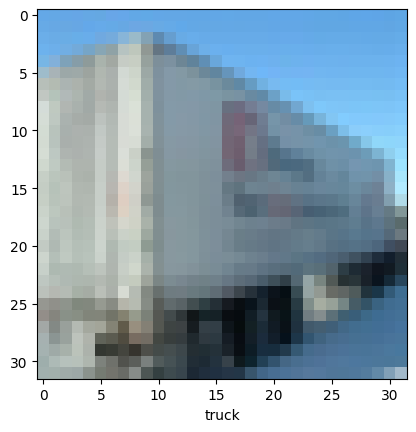

In [ ]:
plot_sample(X_train, y_train, 15)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4630 - accuracy: 0.4739
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1114 - accuracy: 0.6106
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9899 - accuracy: 0.6549
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.9020 - accuracy: 0.6868
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8311 - accuracy: 0.7139
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7701 - accuracy: 0.7322
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.7151 - accuracy: 0.7520
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6685 - accuracy: 0.7669
Epoch 9/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.6257 - accuracy: 0.7811
Epoch 10/10
1563/1563 [==============================] - 73s 47m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9217 - accuracy: 0.7048


[0.9217053651809692, 0.704800009727478]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 17ms/step


array([[5.29447570e-03, 1.27666304e-03, 3.49659100e-03, 5.28080285e-01,
        7.06405903e-04, 9.45598781e-02, 3.30545306e-01, 3.09300795e-03,
        2.94503774e-02, 3.49706761e-03],
       [5.83134206e-05, 1.72289519e-03, 3.86036021e-08, 5.47943288e-11,
        5.01454329e-11, 1.35819047e-12, 1.01777321e-12, 4.95353021e-12,
        9.98211861e-01, 6.92643198e-06],
       [7.58432969e-02, 7.33856186e-02, 4.81135678e-04, 1.46191596e-04,
        6.61555314e-05, 6.64249746e-05, 8.36169056e-06, 2.29718979e-04,
        8.42187762e-01, 7.58525357e-03],
       [6.04945004e-01, 4.74308990e-03, 4.65651648e-03, 1.79074734e-04,
        5.14014158e-04, 4.43382232e-05, 1.36923654e-05, 1.68781880e-05,
        3.84275496e-01, 6.11890573e-04],
       [1.13049524e-07, 9.32240255e-06, 4.50342614e-03, 1.15467096e-03,
        9.44587231e-01, 1.17340045e-04, 4.96247187e-02, 3.85438142e-07,
        2.04377466e-06, 5.44177340e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 8, 0, 4]

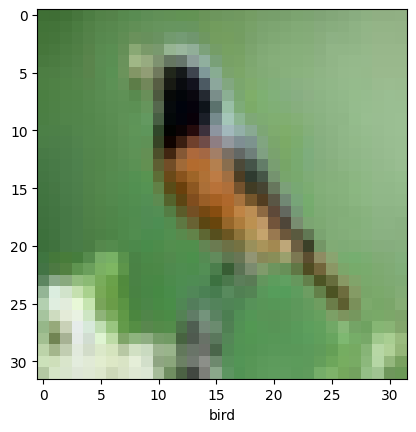

In [ ]:
plot_sample(X_test, y_test,75)

In [ ]:
classes[y_classes[75]]

'ship'